# In this project, topic modelling of the reviews on hotels in London is performed using Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and Nonnegative Matrix Factorization (NMF).

The three models selected are analysed using TF-IDF vectorizer and count vectorizer, and the results are compared

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import re
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
lemmatizer = WordNetLemmatizer()
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

The definition below consist of all the pre-processing steps thats being carried out like removal of html tags, removal of special characters, tokensization, stop words removal and lemmatisation.

In [ ]:
def preprocess(data):
    remove_html = re.sub(r'<[^<>]+>', ' ', str(data))
    remove_special = re.sub(r"[^a-zA-Z]+", ' ', remove_html)
    data_lower = remove_special.lower()
    m = [x.group() for x in re.finditer(r'(\w*)(\w)\2\2(\w*)', data_lower)]
    text_tokens = word_tokenize(data_lower)
    stop_words = set(stopwords.words('english'))
    clean_words = [w for w in text_tokens if not w in stop_words]
    #words = set(nltk.corpus.words.words())
    #filteredSentence = " ".join(w for w in nltk.wordpunct_tokenize(clean_words) \
                                #if w.lower() in words or not w.isalpha())
    #print(clean_words)
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in clean_words]
    #print(lemmas)
    return(" " .join(set(lemmas)))



In [ ]:
# Loading dataset
data_df = pd.read_csv('/content/reviews_london_hotel.csv', encoding= 'cp1252')

In [ ]:
# Preprocessing
clean_data =[]
for i in range(0,len(data_df['review_text'])):
   clean_data.append(preprocess(data_df['review_text'][i]))
clean_words = clean_data

###Applying LDA with TF-IDF vectorizer

In [ ]:
# vectorizing using tfidf
vectorizer = TfidfVectorizer()
data_features = vectorizer.fit_transform(clean_data)

In [ ]:
print(data_features.shape)

(23543, 25474)


In [ ]:
#@title
#idf=vectorizer.idf_
#dd=dict(zip(vectorizer.get_feature_names(), idf))
#l=sorted(dd, key=(dd).get)
#print(l)
#print(l[0],l[-1])
#print(dd['hotel'])
#print(dd['immaculate']) 

In [ ]:
lda_idf_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=0,max_iter=1) 
lda_idf=lda_idf_model.fit_transform(data_features)
print(lda_idf.shape)
print(lda_idf)

(23543, 10)
[[0.00941318 0.00941298 0.71618446 ... 0.20851034 0.0094132  0.00941316]
 [0.0174942  0.0174942  0.08558647 ... 0.77445996 0.0174942  0.0174942 ]
 [0.01614961 0.01614821 0.65695114 ... 0.21385211 0.01614976 0.01614944]
 ...
 [0.01704744 0.01704744 0.01705071 ... 0.84656975 0.01704744 0.01704744]
 [0.01616232 0.01616232 0.85453639 ... 0.01616503 0.01616232 0.01616232]
 [0.01709882 0.01709882 0.12615446 ... 0.67143439 0.01709882 0.01709882]]


In [ ]:
vocab_lda_idf = vectorizer.get_feature_names()
for i, comp in enumerate(lda_idf_model.components_):
    vocab_comp = zip(vocab_lda_idf, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
costly taylor perrier laurent extraordinarily elizabeth pickle partnership tarts personell 

Topic 1: 
teenage floral hiccup devine parade impecable suffice regency nephew relationship 

Topic 2: 
breakfast room location clean walk good tube hotel station staff 

Topic 3: 
vegetarians programme constructive supreme accomplish switzerland artists samuel norwegian afficionado 

Topic 4: 
spray sisters aries chaotic dr alongside ne eva retrieve boutiques 

Topic 5: 
ba quest superbreak millennial rescue um engine bangkok del personale 

Topic 6: 
astound hotter attic nay tastiest terrine frontdesk sidecar charcuterie dude 

Topic 7: 
staff hotel stay service room great bar london make food 

Topic 8: 
alice strive coctails hong kong hardware witch je op sizeable 

Topic 9: 
manuel shift gross edgy du bearable es se peroni longue 



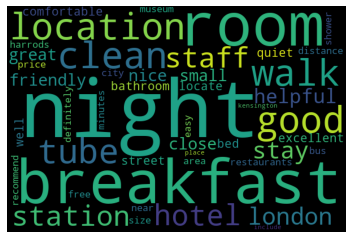

In [ ]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_idf_model.components_[index]
  vocab_comp = zip(vocab_lda_idf, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 
draw_word_cloud(2)

###Applying LSA with TF-IDF vectorizer

In [ ]:
lsa_idf_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
lsa_idf=lsa_idf_model.fit_transform(data_features)

In [ ]:
print(lsa_idf)
print(lsa_idf.shape)

[[ 0.26685253  0.0674273  -0.08432603 ...  0.09184744  0.01107039
  -0.00194409]
 [ 0.16515878 -0.13222765  0.04313319 ... -0.00854195 -0.0436144
   0.02669408]
 [ 0.18492235  0.11851315  0.02631064 ... -0.05304191 -0.02591753
   0.0528917 ]
 ...
 [ 0.23426022 -0.1180741   0.02243592 ... -0.00223577 -0.02995517
   0.09176649]
 [ 0.21606088  0.19744421  0.07026833 ... -0.01177697  0.00639737
   0.0028933 ]
 [ 0.18043373 -0.07847803 -0.0602789  ... -0.02861913 -0.06260968
  -0.03280468]]
(23543, 10)


In [ ]:
print(lsa_model.components_.shape)
print(lsa_model.components_)

(10, 25474)
[[ 3.74921114e-05  8.01289424e-06  1.51081955e-05 ...  2.58170501e-05
   5.04920461e-05  1.99081559e-05]
 [ 1.62917209e-05 -2.90249185e-05  1.02227629e-05 ...  4.65176714e-05
   2.27585703e-04  5.04447788e-05]
 [ 1.58653715e-05 -8.07920835e-05 -3.84567218e-05 ... -2.83709617e-05
  -7.61365692e-06 -9.29557963e-05]
 ...
 [-4.89021369e-05  8.78430826e-05  9.84589781e-05 ... -5.16938566e-05
   2.16019166e-05  1.25155891e-05]
 [ 1.56427063e-05  4.05956523e-05 -3.25227368e-05 ... -9.25341298e-05
   2.33527857e-04  5.81757829e-05]
 [ 2.54761726e-05  8.70850159e-05  8.85828728e-05 ... -1.96091436e-04
   9.47879737e-05  2.28548196e-05]]


In [ ]:
vocab_lsa_idf = vectorizer.get_feature_names()
for i, comp in enumerate(lsa_idf_model.components_):
    vocab_comp = zip(vocab_lsa_idf, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
room hotel staff stay london great location breakfast service would 

Topic 1: 
tube clean station walk location breakfast good close helpful small 

Topic 2: 
staff great recommend location friendly excellent amaze highly helpful definitely 

Topic 3: 
friendly lovely birthday would bed helpful definitely clean night view 

Topic 4: 
view bar river thames modern great restaurant mondrian rumpus bank 

Topic 5: 
walk tube south station birthday museum distance kensington albert harrods 

Topic 6: 
food excellent good tea afternoon bar breakfast service drink price 

Topic 7: 
bed comfortable bathroom shower tea bath beautiful large spa spacious 

Topic 8: 
recommend highly would anyone definitely expect service price friends hotels 

Topic 9: 
tea afternoon place amaze love nice great back go beautiful 



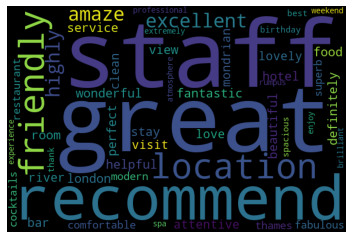

In [ ]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa_idf_model.components_[index]
  vocab_comp = zip(vocab_lsa_idf, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 
draw_word_cloud(2)

###Applying NMF with TF-IDF vectorizer

In [ ]:
nmf_idf_model = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5)
nmf_idf = nmf_idf_model.fit_transform(data_features)

In [ ]:
print(nmf_model.components_)

[[7.87327950e-05 0.00000000e+00 0.00000000e+00 ... 2.01812931e-04
  1.16019246e-03 0.00000000e+00]
 [3.18388932e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.13223390e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.27804792e-03 0.00000000e+00 1.41439220e-04 ... 0.00000000e+00
  3.13505756e-03 1.32175492e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
vocab_nmf_idf = vectorizer.get_feature_names()

for i, comp in enumerate(nmf_idf_model.components_):
    vocab_comp = zip(vocab_nmf_idf, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
special birthday make thank savoy welcome us staff feel treat 

Topic 1: 
friendly helpful clean staff breakfast location room good stay great 

Topic 2: 
get go us check one take even could ask like 

Topic 3: 
best london service spa hotels hotel stay amaze beautiful one 

Topic 4: 
view river thames bar mondrian great modern rumpus bank cocktails 

Topic 5: 
tube walk station museum close kensington distance harrods restaurants street 

Topic 6: 
food excellent service restaurant bar good quality great dinner drink 

Topic 7: 
bed comfortable bathroom shower bath large spacious quiet size room 

Topic 8: 
recommend highly would anyone definitely friends hotel stay enough thoroughly 

Topic 9: 
tea afternoon sandwich cake scones delicious champagne experience treat teas 



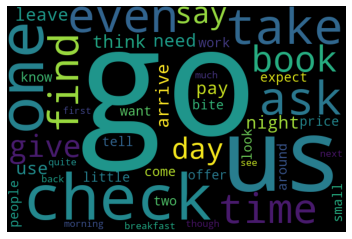

In [ ]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=nmf_idf_model.components_[index]
  vocab_comp = zip(vocab_nmf_idf, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 
draw_word_cloud(2)

###Applying LDA with Count vectorizer (TF)

In [ ]:
tf_vectorizer = CountVectorizer()
tf_features = tf_vectorizer.fit_transform(clean_data)

In [ ]:
print(tf_features.shape)

(23543, 25474)


In [ ]:
lda_tf_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=0,max_iter=1) 
lda_tf=lda_tf_model.fit_transform(tf_features)

In [ ]:
vocab_lda_tf = tf_vectorizer.get_feature_names()

for i, comp in enumerate(lda_tf_model.components_):
    vocab_comp = zip(vocab_lda_tf, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
hotel stay staff room service london make bar great one 

Topic 1: 
bridge tower tate blackfriars containers paul sea mondrian waterloo accommodation 

Topic 2: 
room hotel breakfast stay staff location good london walk clean 

Topic 3: 
apex wall crowd suggest impression loud refurbishment fell period daughters 

Topic 4: 
toilet con reasonable toast cereals orange harvey whenever purchase com 

Topic 5: 
tell hair apology person issue basically assure spread security dryer 

Topic 6: 
mandarin oriental thoroughly penny pleasantly chain fish warmth television consist 

Topic 7: 
high noise history entrance ask call natural say despite point 

Topic 8: 
cocktail grill meal savoy bar american beautifully live cocktails team 

Topic 9: 
garden art covent deco style town carry beautifully fi wi 



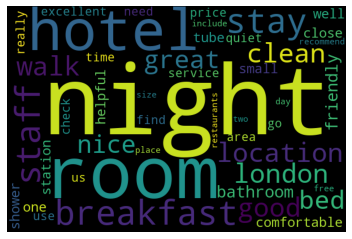

In [ ]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_tf_model.components_[index]
  vocab_comp = zip(vocab_lda_tf, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 
draw_word_cloud(2)

###Applying LSA with Count vectorizer (TF)

In [ ]:
lsa_tf_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
lsa_tf=lsa_tf_model.fit_transform(tf_features)

In [ ]:
vocab_lsa_tf = tf_vectorizer.get_feature_names()

for i, comp in enumerate(lsa_tf_model.components_):
    vocab_comp = zip(vocab_lsa_tf, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
room hotel stay staff london breakfast service would great one 

Topic 1: 
us make savoy go take experience say even time one 

Topic 2: 
walk station tube small breakfast bathroom bed get good clean 

Topic 3: 
service london location great hotels best walk hotel bar excellent 

Topic 4: 
bar good great view room bed nice bathroom service lovely 

Topic 5: 
great walk bar location staff friendly tube station food restaurant 

Topic 6: 
bed view stay london walk bathroom shower night bar great 

Topic 7: 
comfortable bed bathroom well tea service shower large breakfast excellent 

Topic 8: 
would recommend service breakfast us lovely walk tea definitely highly 

Topic 9: 
would recommend london highly well definitely friendly expect hotels hotel 



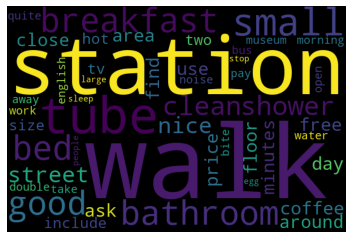

In [ ]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa_tf_model.components_[index]
  vocab_comp = zip(vocab_lsa_tf, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 
draw_word_cloud(2)

###Applying NMF with Count vectorizer (TF)

In [ ]:
nmf_tf_model = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5)
nmf_tf = nmf_tf_model.fit_transform(tf_features)

In [ ]:
vocab_nmf_tf = tf_vectorizer.get_feature_names()

for i, comp in enumerate(nmf_tf_model.components_):
    vocab_comp = zip(vocab_nmf_tf, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
get go one ask time take say could like come 

Topic 1: 
breakfast good room clean hotel stay nice small price buffet 

Topic 2: 
staff friendly helpful hotel room clean excellent well stay comfortable 

Topic 3: 
london stay hotel room one best hotels time visit every 

Topic 4: 
great location bar view room hotel restaurant river really nice 

Topic 5: 
walk tube station location london street close restaurants distance museum 

Topic 6: 
service food excellent well experience restaurant quality hotel good high 

Topic 7: 
bed bathroom comfortable shower large room bath night well size 

Topic 8: 
make us special savoy experience feel bar lovely tea treat 

Topic 9: 
would recommend stay definitely highly hotel room lovely anyone expect 



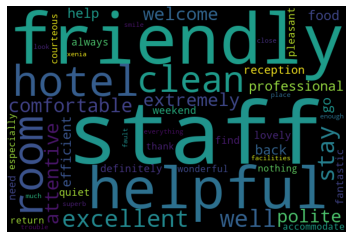

In [ ]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=nmf_tf_model.components_[index]
  vocab_comp = zip(vocab_nmf_tf, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 
draw_word_cloud(2)